In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel("furniture_sales.xlsx")

In [3]:
df.head()
df.tail()


,Gender,Region,Order Date,Delivery Date,Product Category,Product,Unit Price (FCFA),Quantity,Sales (FCFA),Profit (FCFA),Delivery Status,Payment Method
45,Female,Logbaba,2025-04-26,2025-05-03,Tables,Work Table,192343,4,769372,211986.08,Pending,Credit Card
46,Male,Bépanda,2025-02-11,2025-02-15,Sofas,Loveseat,167294,5,836470,239450.14,Cancelled,Mobile Money
47,Male,Deïdo,2025-01-23,2025-01-24,Beds,Single Bed,162653,2,325306,89425.53,Cancelled,Credit Card
48,Male,Bonabéri,2025-01-18,2025-01-26,Cabinets,Filing Cabinet,42395,1,42395,8619.14,Delivered,Cash
49,Male,Akwa,2025-01-06,2025-01-07,Chairs,Dining Chair,223940,4,895760,148802.64,Cancelled,Credit Card


In [6]:
df.columns

Index(['Gender', 'Region', 'Order Date', 'Delivery Date', 'Product Category',
       'Product', 'Unit Price (FCFA)', 'Quantity', 'Sales (FCFA)',
       'Profit (FCFA)', 'Delivery Status', 'Payment Method'],
      dtype='object')

In [7]:
df.describe()

,Order Date,Delivery Date,Unit Price (FCFA),Quantity,Sales (FCFA),Profit (FCFA)
count,50,50,50.000000,50.000000,5.000000e+01,50.000000
mean,2025-02-13 21:07:12,2025-02-18 16:19:12,142665.480000,2.980000,4.280058e+05,92162.923800
min,2024-11-16 00:00:00,2024-11-17 00:00:00,25399.000000,1.000000,3.434900e+04,5287.150000
25%,2025-01-05 06:00:00,2025-01-11 06:00:00,94253.500000,2.000000,1.977730e+05,29429.465000
50%,2025-02-11 12:00:00,2025-02-17 00:00:00,153826.500000,3.000000,3.712870e+05,75925.310000
75%,2025-03-28 18:00:00,2025-04-02 18:00:00,195940.000000,4.000000,5.862045e+05,132226.095000
max,2025-04-27 00:00:00,2025-05-06 00:00:00,244762.000000,5.000000,1.223810e+06,290320.220000
std,NaN,NaN,65489.498422,1.362621,2.951147e+05,72708.515869


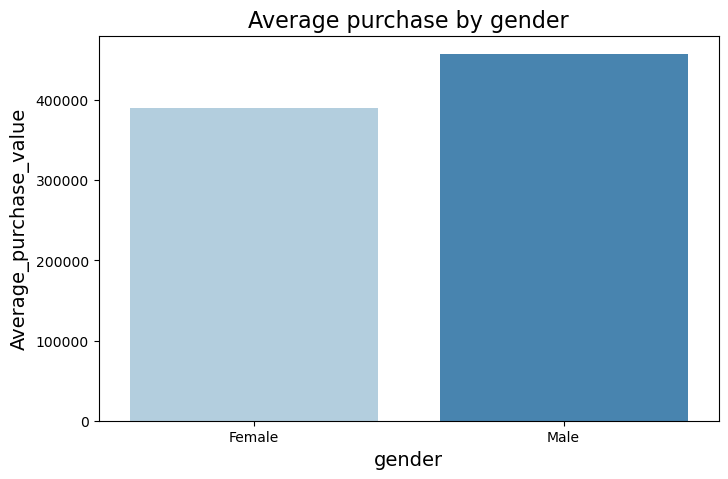

In [5]:
average_purchase_value =df.groupby('Gender')['Sales (FCFA)'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Sales (FCFA)', data=average_purchase_value, palette='Blues')

# Adding titles and labels
plt.title('Average purchase by gender', fontsize=16)
plt.xlabel('gender', fontsize=14)
plt.ylabel('Average_purchase_value', fontsize=14)
#plt.show()

plt.savefig("barplot.png")

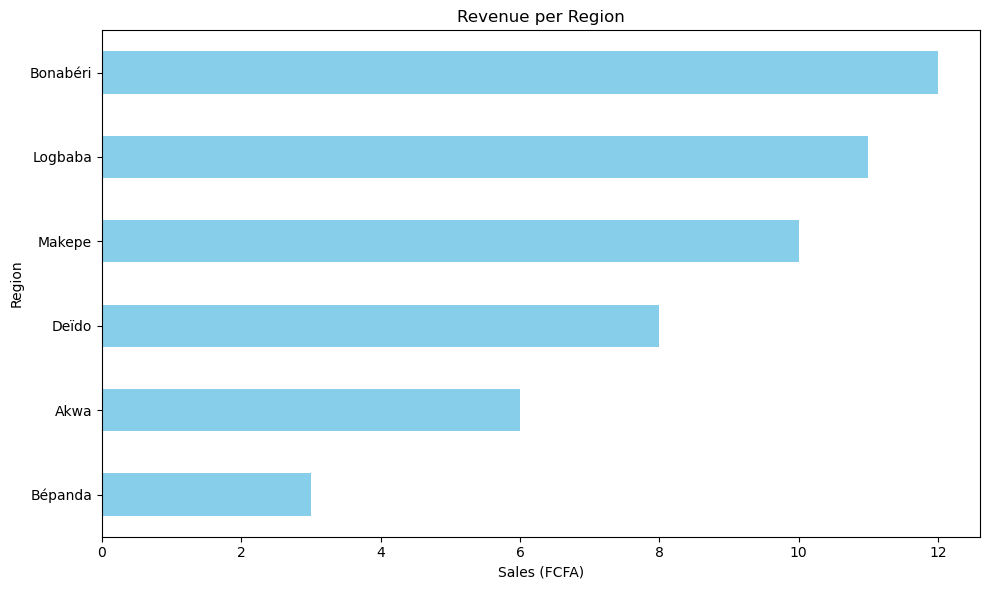

In [7]:
#region with most customers and highest revenue?
region_counts = df['Region'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
region_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Sales (FCFA)')
plt.ylabel('Region')
plt.title('Revenue per Region')
plt.gca().invert_yaxis()  # Highest values on top
plt.tight_layout()
#plt.show()
plt.savefig("revenue by region.png")

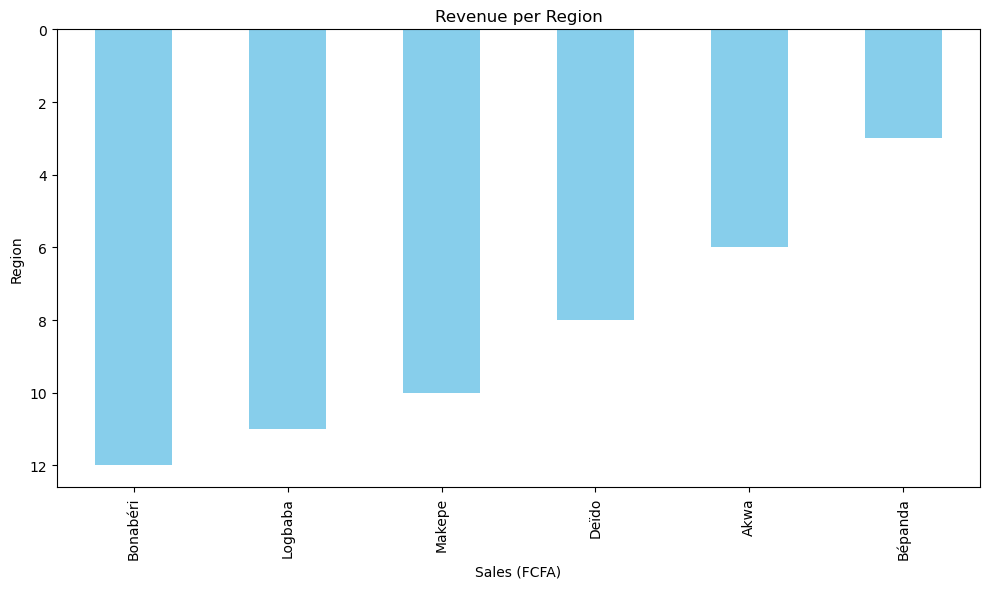

In [4]:
#region with most customers and highest revenue?
region_counts = df['Region'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sales (FCFA)')
plt.ylabel('Region')
plt.title('Revenue per Region')
plt.gca().invert_yaxis()  # Highest values on top
plt.tight_layout()
#plt.show()
plt.savefig("revenue by region.png")

Highest sales generated by: Sofas (4931610.00)


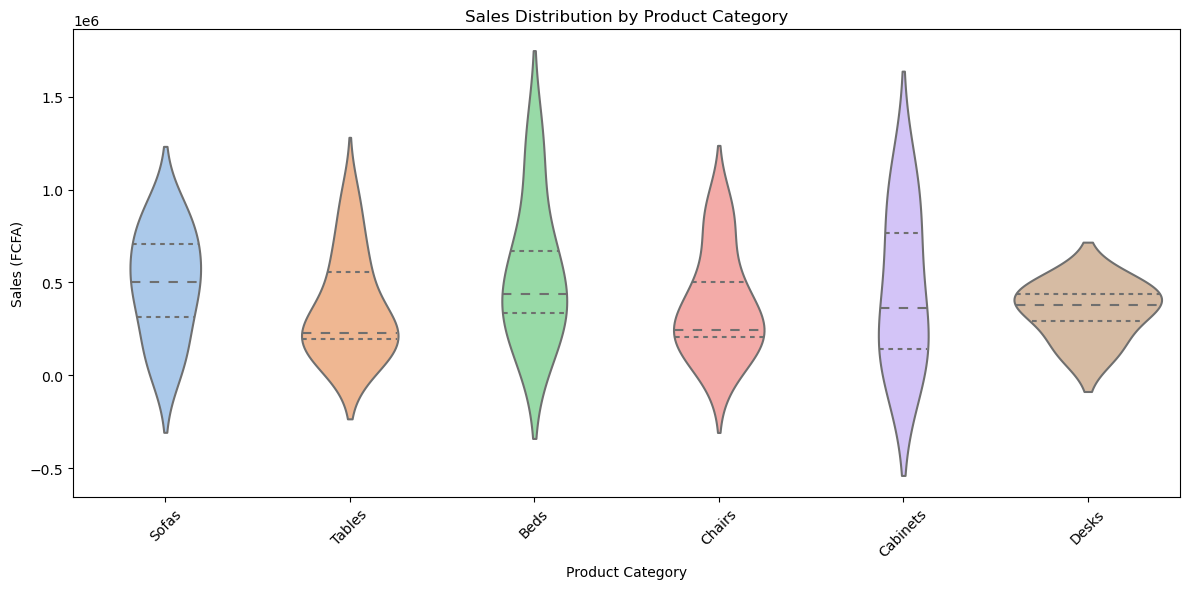

In [20]:
# Group by Product Category and calculate total sales
category_sales = df.groupby('Product Category')['Sales (FCFA)'].sum().reset_index()

# Identify the highest sales category
top_category = category_sales.sort_values(by='Sales (FCFA)', ascending=False).iloc[0]
print(f"Highest sales generated by: {top_category['Product Category']} ({top_category['Sales (FCFA)']:.2f})")

# Use a violin plot to show the distribution of sales by product category
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Product Category', y='Sales (FCFA)', inner='quartile', palette='pastel')
plt.title('Sales Distribution by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()
plt.savefig("volinplot.png")

In [4]:
total_sales=df['Sales (FCFA)'].sum()
print("Total sales:", total_sales)

Total sales: 21400289


Average Delivery Time per Product Category (in days):
Product Category
Cabinets    6.166667
Tables      6.000000
Chairs      5.000000
Sofas       3.600000
Beds        3.500000
Desks       3.250000
Name: Delivery Time (Days), dtype: float64


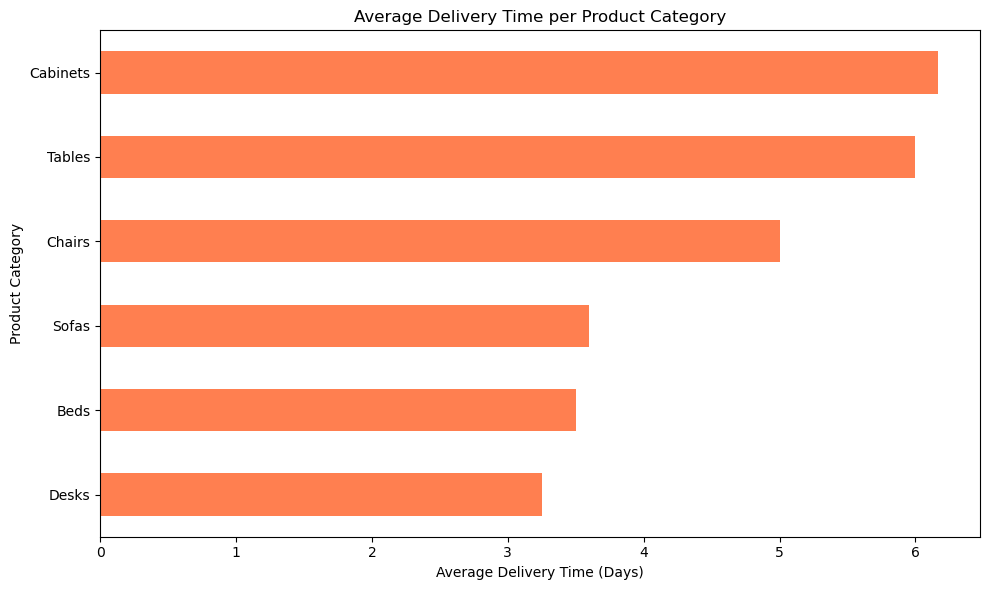

In [10]:
#delivery time 
# Convert dates to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

# Calculate delivery time in days
df['Delivery Time (Days)'] = (df['Delivery Date'] - df['Order Date']).dt.days

# Group by product category and calculate average delivery time
avg_delivery_time = df.groupby('Product Category')['Delivery Time (Days)'].mean().sort_values(ascending=False)

# Display result
print("Average Delivery Time per Product Category (in days):")
print(avg_delivery_time)

# Optional: Plot the result
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
avg_delivery_time.plot(kind='barh', color='coral')
plt.xlabel('Average Delivery Time (Days)')
plt.title('Average Delivery Time per Product Category')
plt.gca().invert_yaxis()
plt.tight_layout()
#plt.show()
plt.savefig("delivery.png")

The most used payment method is: Cash (18 times)


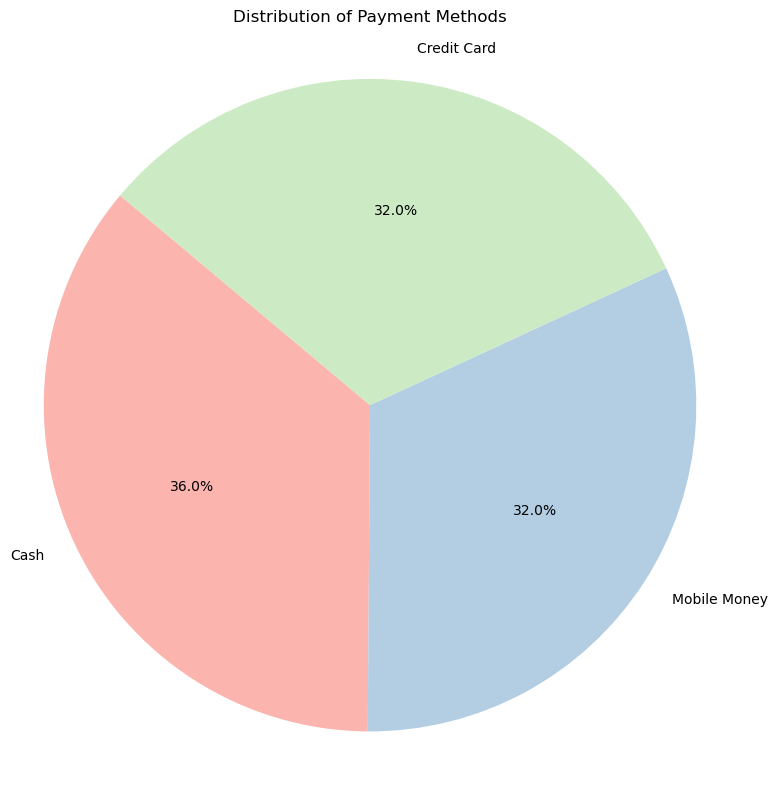

In [13]:
# payment method
# Count each payment method
payment_counts = df['Payment Method'].value_counts()

# Show the most used payment method
most_used = payment_counts.idxmax()
count = payment_counts.max()
print(f"The most used payment method is: {most_used} ({count} times)")

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Payment Methods')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.tight_layout()
#plt.show()
plt.savefig("payment method.png")

C:\Users\NDIFOR B. CLOUDIA-RI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NDIFOR B. CLOUDIA-RI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


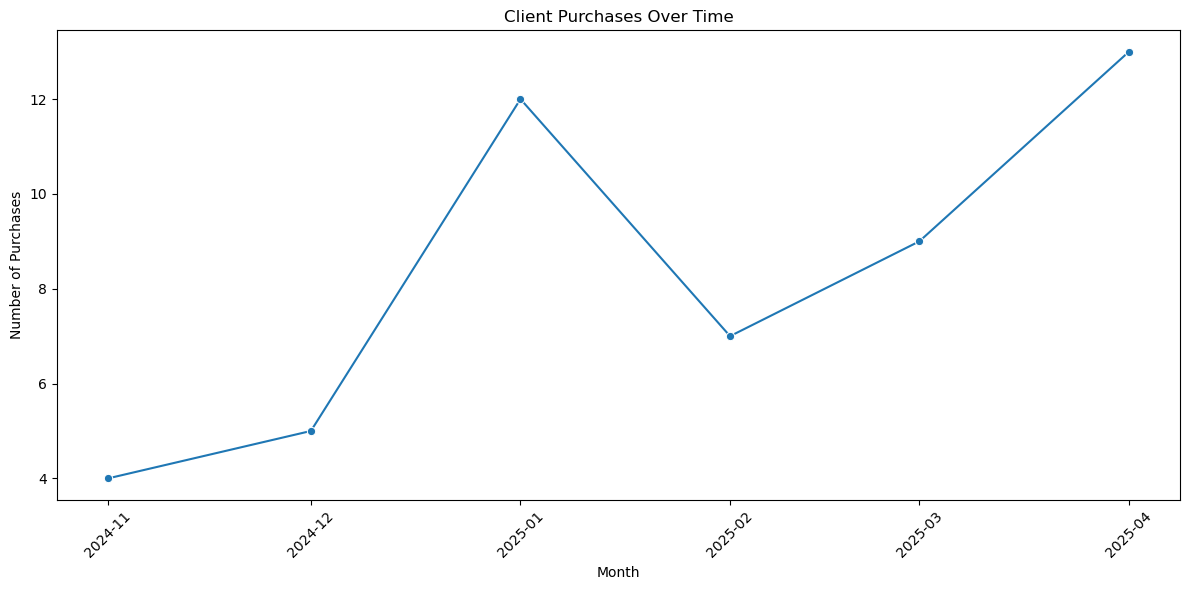

In [15]:

# Convert order date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by month (you can change to 'D' for day or 'W' for week)
df['Order Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()
monthly_orders = df.groupby('Order Month').size().reset_index(name='Number of Purchases')

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders, x='Order Month', y='Number of Purchases', marker='o')
plt.title('Client Purchases Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()
plt.savefig("linegraph.png")

In [17]:
# Filter canceled orders
cancelled_orders = df[df['Delivery Status'].str.lower() == 'cancelled']

# Count canceled orders
num_cancelled = len(cancelled_orders)

# Calculate total lost profit from canceled orders
lost_profit = cancelled_orders['Profit (FCFA)'].sum()

# Display results
print(f"Number of cancelled orders: {num_cancelled}")
print(f"Total profit impact of cancelled orders: {lost_profit:.2f}")

Number of cancelled orders: 16
Total profit impact of cancelled orders: 1890962.10
